In [94]:
import pandas as pd

iris = pd.read_csv("/Users/priyankakondaparthi/Downloads/iris-data.csv")

In [95]:
#top 5 rows of data set
iris.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The below information is inferred from running the head command
1.Total columns - 5
2.Name of columns - sepal_length_cm,sepal_length_cm,sepal_width_cm,	petal_length_cm,petal_width_cm, class

In [96]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Total columns:150
Missing values in petal_width_cm column:5
Data types of all columns is float except for class column which is of object type 

In [97]:
iris.describe()
#iris['class'].value_counts()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


the above description gives the about statistical information of each column and row indicate the count, mean etc. 
by observing the information, the minimum value is 0.05,there is large deviation from the given mean, looks like incorrect entry.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f759828>,
      dtype=object)

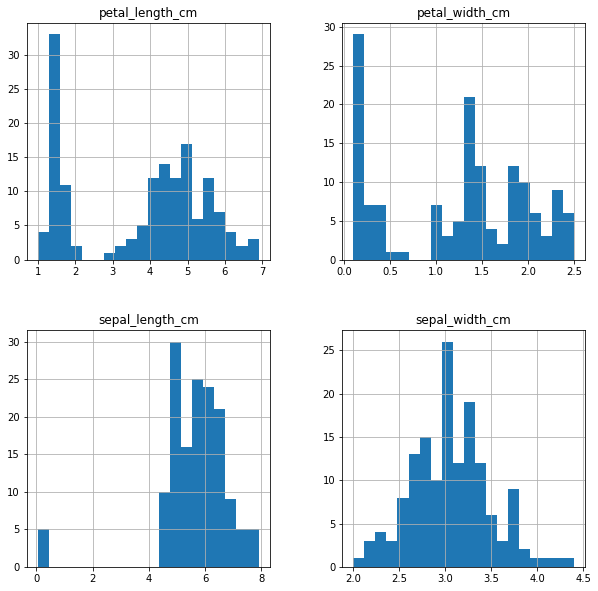

In [98]:
iris.hist (bins=20,figsize=(10,10))

from the histogram of speal_length_cm we could observe that there is any entry which is largely deviated from the other data.
The histograms of petal length and petal width show that the data is distributed in two modal peaks.
The data of sepal width is distributed with one peak

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fa14a90>,
      dtype=object)

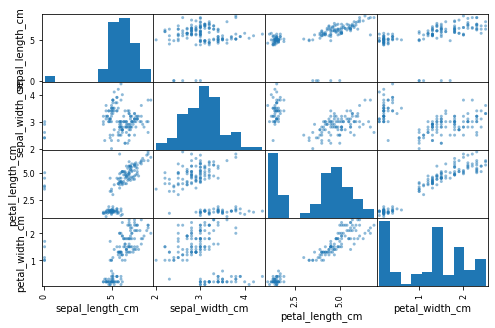

In [99]:
import pandas
from pandas.plotting import scatter_matrix
attributes = ["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm"]
scatter_matrix(iris[attributes], figsize=(8,5))

In [100]:
iris.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.066091,0.489083,0.469734
sepal_width_cm,0.066091,1.000000,-0.419796,-0.348464
petal_length_cm,0.489083,-0.419796,1.000000,0.958934
petal_width_cm,0.469734,-0.348464,0.958934,1.000000


Petal length and petal width are highly correlated with value of nearly equal to 1
sepal length and sepal width are least correlated with value of 0.066091
There is positive correlation between (sepal length,sepal width) (sepal length,petal length) and sepal length,petal width)
Negative correlation between (petal length,sepal width),(petal length,sepal width),sepal width,petal width)

In [101]:
#part b

iris=iris.dropna()
iris
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


all the values with NA are dropped, remaining values are 145.

In [102]:
#class name
iris['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

By observing the class names, there might be the spelling mistake of class name while entering the data, we need to rename the values "Iris-setossa","versicolor".

In [103]:
##iris[iris['class'] == 'Iris-setossa']= iris[iris['class']=='Iris-setosa']
#iris[iris['class'] == 'versicolor'] = iris[iris['class'] == 'Iris-versicolor']

iris.loc[iris[iris['class']== 'Iris-setossa'].index , 'class'] ='Iris-setosa'
iris.loc[iris[iris['class']== 'versicolor'].index , 'class'] ='Iris-versicolor'

In [104]:
iris['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

In [105]:
iris['sepal_width_cm'].value_counts()
#iris[(iris['class']  ==   'Iris-setosa') & (iris['sepal_width_cm'] <= 2.5)]
#iris[(iris['class']=='Iris-setosa')& (iris[sepal_width_cm'] <= 2.5)].index
iris.drop(iris[(iris['class']=='Iris-setosa') & (iris['sepal_width_cm'] <= 2.5)].index,inplace=True)
iris.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    144 non-null float64
sepal_width_cm     144 non-null float64
petal_length_cm    144 non-null float64
petal_width_cm     144 non-null float64
class              144 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


As given in the question the sepal width with less than 2.5 cm in class name=Iris-setosa are dropped from the 145 entries, so the remaining values are 144 

In [106]:
iris_meter_cm= iris[(iris['class'] == 'Iris-versicolor') & (iris['sepal_length_cm']< 0.1)]
#if (iris['sepal_length_cm'] < 0.1) :
    #iris.sepal_length_cm*100
iris.loc[iris_meter_cm.index,'sepal_length_cm'] *= 100
iris.info()
iris['sepal_length_cm'].value_counts()

iris[(iris['class'] == 'Iris-versicolor') & (iris['sepal_length_cm']< 0.1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    144 non-null float64
sepal_width_cm     144 non-null float64
petal_length_cm    144 non-null float64
petal_width_cm     144 non-null float64
class              144 non-null object
dtypes: float64(4), object(1)
memory usage: 11.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
sepal_length_cm    0 non-null float64
sepal_width_cm     0 non-null float64
petal_length_cm    0 non-null float64
petal_width_cm     0 non-null float64
class              0 non-null object
dtypes: float64(4), object(1)
memory usage: 0.0+ bytes


All the entries in the data are to be in cms, but some are wrongly entered as meters in class 'Iris-versicolor', those are converted into cms.

In [107]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
iris_west = iris.dropna()
iris_west['class'].unique()
iris_west_allen = iris_west["class"]
nora_west = enc.fit_transform(iris_west_allen)
nora_west
iris['class']=nora_west
#iris['class'].value_counts()
iris.to_csv(r'/Users/PriyankaKondaparthi/Documents/iris-data_modified.csv')
iris['class'].value_counts()
#iris.head(150)


2    50
1    50
0    44
Name: class, dtype: int64

In [93]:

iris.head(150)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
12,4.8,3.0,1.4,0.1,0
13,5.7,3.0,1.1,0.1,0
14,5.8,4.0,1.2,0.2,0
